# Lineare Regression

**Triggerwarnung:** In diesem Notebook werden COVID-19 Daten behandelt

---

Wir wollen eine lineare Regression für COVID-19 Daten durchführen.

Dabei betrachten wir folgende Variablen:
* X = Anzahl der Impfungen in 1000/Tag
* Y = Anzahl der der positiven Tests in 1000/Tag
* Z = Anzahl der Krankenhauseinweisungen in 1000/Tag

Wir nehmen an, dass Z linear von X und Y abhängt und wollen diese Abhängigkeit schätzen.

Zunächst laden wir die Daten.

In [3]:
#install.packages("COVID19")
library(COVID19)
data = covid19(country = "US", level = 1)

Wir schauen uns die Daten an.

In [4]:
head(data)

id,date,vaccines,tests,confirmed,recovered,deaths,hosp,vent,icu,⋯,currency,administrative_area_level,administrative_area_level_1,administrative_area_level_2,administrative_area_level_3,latitude,longitude,key,key_apple_mobility,key_google_mobility
<chr>,<date>,<dbl>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,⋯,<chr>,<int>,<chr>,<lgl>,<lgl>,<dbl>,<dbl>,<lgl>,<chr>,<chr>
USA,2020-01-22,NA,NA,1,NA,NA,NA,NA,NA,⋯,USN,1,United States,NA,NA,38,-97,NA,United States,US
USA,2020-01-23,NA,NA,1,NA,NA,NA,NA,NA,⋯,USN,1,United States,NA,NA,38,-97,NA,United States,US
USA,2020-01-24,NA,NA,2,NA,NA,NA,NA,NA,⋯,USN,1,United States,NA,NA,38,-97,NA,United States,US
USA,2020-01-25,NA,NA,2,NA,NA,NA,NA,NA,⋯,USN,1,United States,NA,NA,38,-97,NA,United States,US
USA,2020-01-26,NA,NA,5,NA,NA,NA,NA,NA,⋯,USN,1,United States,NA,NA,38,-97,NA,United States,US
USA,2020-01-27,NA,NA,5,NA,NA,NA,NA,NA,⋯,USN,1,United States,NA,NA,38,-97,NA,United States,US


Jetzt extrahieren wir die Datenpunkte, für die `hosp` und `vaccines` keine `NA`s sind.

In [5]:
index = !is.na(data$hosp) & !is.na(data$vaccines)
v = data[index, ]

Die Anzahl der Datenpunkte ist `k`.

In [6]:
k = length(v$vaccines)
k

[1] 27

Da wir erwarten, dass der Effekt einer Impfung erst mit einer Verzögerung eintritt, schauen wir die Abhängigkeit um $t=7$ Tage versetzt an.

Erinnerung:
* X = Anzahl der Impfungen in 1000/Tag
* Y = Anzahl der der positiven Tests in 1000/Tag
* Z = Anzahl der Krankenhauseinweisungen in 1000/Tag

In [8]:
t = 7
Z = v$hosp[(t+1):k] / 1000 # in 1000/Tag
X = diff(v$vaccines[1:(k-t+1)]) / 1000
Y = diff(v$confirmed[1:(k-t+1)]) / 1000

Jetzt schätzen wir die Abhängigkeit von Z von X. 

In [9]:
L = lm(Z ~ X)
L


Call:
lm(formula = Z ~ X)

Coefficients:
(Intercept)            X  
 127.791399    -0.006164  


Wir schätzen die Abhängigkeit von Z von Y. 

In [10]:
L1 = lm(Z ~ Y)
L1


Call:
lm(formula = Z ~ Y)

Coefficients:
(Intercept)            Y  
  116.40630      0.01638  


Wir plotten die Ergebnisse:

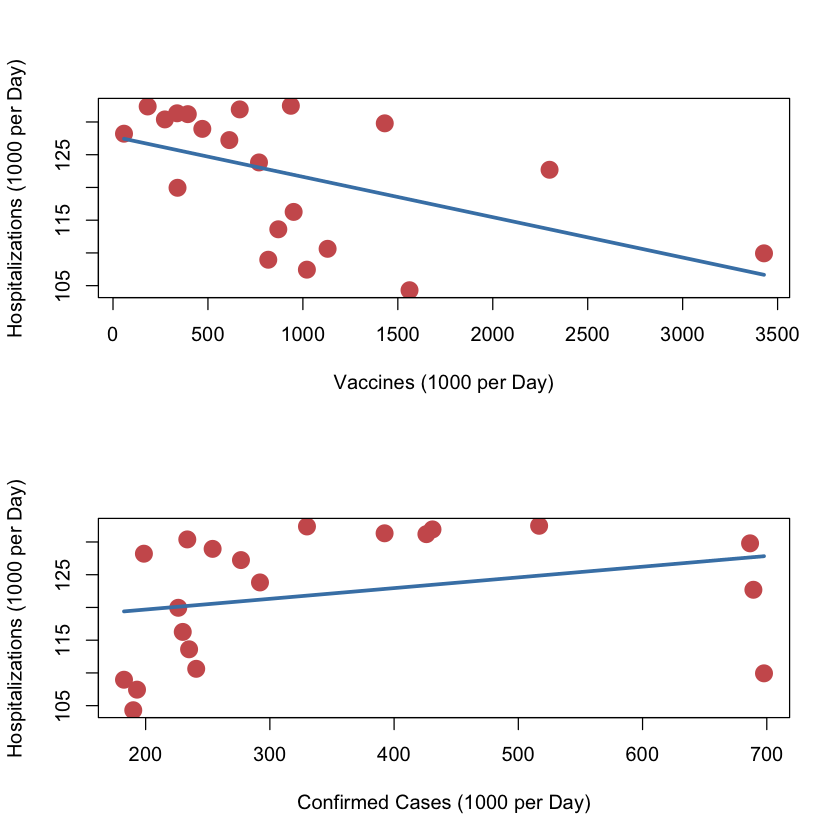

In [11]:
par(mfrow = c(2,1))
# Modell 1
c = coefficients(L)
plot(X, Z, pch = 16, cex = 2, col = "indianred", 
     xlab = "Vaccines (1000 per Day)", ylab = "Hospitalizations (1000 per Day)")
lines(X, c[1] + c[2] * X, col = "steelblue", lw = 3)
# Modell 2
c = coefficients(L1)
plot(Y, Z, pch = 16, cex = 2, col = "indianred", 
     xlab = "Confirmed Cases (1000 per Day)", ylab = "Hospitalizations (1000 per Day)")
lines(Y, c[1] + c[2] * Y, col = "steelblue", lw = 3)

Wir schätzen Z in Abhängigkeit von X und Y:

In [12]:
L2 = lm(Z ~ X + Y)
L2


Call:
lm(formula = Z ~ X + Y)

Coefficients:
(Intercept)            X            Y  
  115.35838     -0.01420      0.05747  


Wir plotten die Abhängigkeit in einem 3D-Plot.

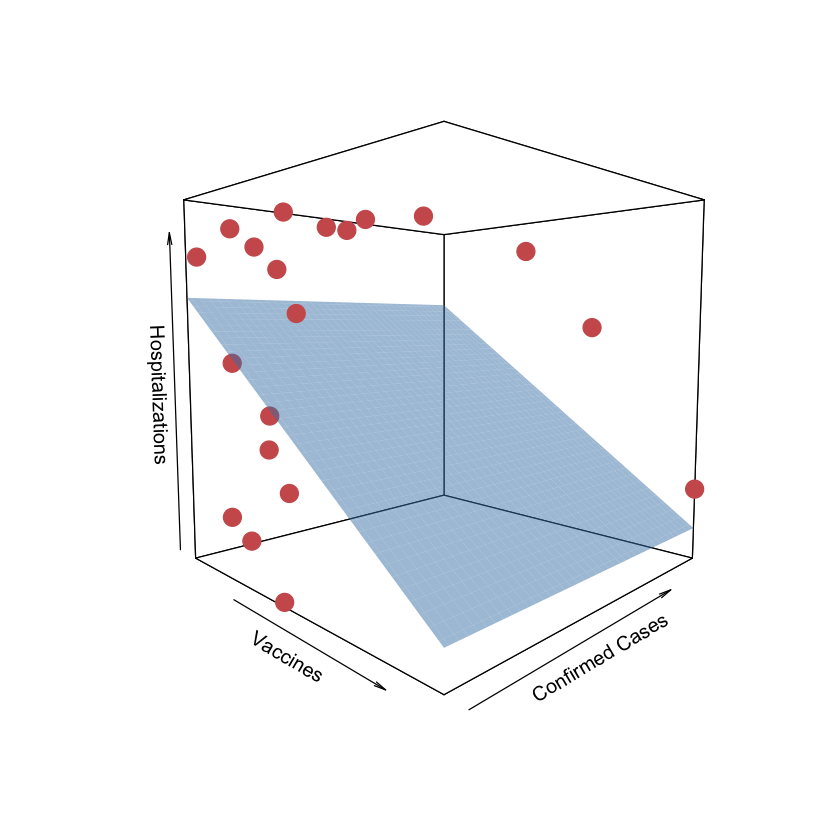

In [13]:
#install.packages("plot3D")
library(plot3D)

# code copied from
# https://rpubs.com/pjozefek/576206
c = coefficients(L2)
grid.lines = 40
x <- seq(min(X), max(X), length.out = grid.lines)
y <- seq(min(Y), max(Y), length.out = grid.lines)
xy <- expand.grid(x = x, y = y)
z <- matrix(c[1] + c[2] * x + c[3] * y, 
                 nrow = grid.lines, ncol = grid.lines)


scatter3D(X, Y, Z, pch = 19, cex = 2, col="indianred", 
          theta = 45, phi = 5,
          xlab = "Vaccines", ylab = "Confirmed Cases", zlab = "Hospitalizations",  
          surf = list(x = x, y = y, z = z,  
                      facets = TRUE, alpha=0.5, col = "steelblue"), border="black")